In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

import functions as myfunc

## Given Values and Functions

In [2]:
nodes = np.loadtxt("Lösung/Netz1D_p.dat")
number_of_nodes = len(nodes)
element_indices = np.loadtxt("Lösung/Elemente1D_t.dat")

coefficients_matrix = np.loadtxt("Lösung/Netz1D_Matrix_K.dat")
rhs_matrix = np.loadtxt("Lösung/Netz1D_Vector_D.dat").reshape((number_of_nodes, 1))

def alpha(x):
    """
    Piecewise function for alpha(x):
    - 3 in [1.5, 2.7]
    - x^2 elsewhere
    """
    x = np.asarray(x)
    return np.where((1.5 <= x) & (x <= 2.7), 3.0, np.square(x))

def beta(x):
    """
    Piecewise function for beta(x):
    - x / (x+1) in [1, 2]
    - x^2 elsewhere
    """
    x = np.asarray(x)
    return np.where((1 <= x) & (x <= 2), x / (x + 1), np.square(x))

def rhs(x):
    """
    Right-hand side f(x):
    - x in [2, 4]
    - x + 1 elsewhere
    """
    x = np.asarray(x)
    return np.where((2 <= x) & (x <= 4), x, x + 1)

In [3]:
DOMAIN_BOUNDARY = {
    "Lower Bound": 1,
    "Upper Bound": 4
}
BOUNDARY_CONDITION = {
    "Lower Bound": {
        "x": DOMAIN_BOUNDARY["Lower Bound"],
        "Phi": np.exp(DOMAIN_BOUNDARY["Lower Bound"])
    },
    "Upper Bound": {
        "x": DOMAIN_BOUNDARY["Upper Bound"],
        "Phi": np.exp(DOMAIN_BOUNDARY["Upper Bound"])
    }
}

BOUNDARY_CONDITION["Lower Bound"]["x Index"] = np.where(np.isclose(nodes, BOUNDARY_CONDITION["Lower Bound"]["x"]))[0][0]
BOUNDARY_CONDITION["Upper Bound"]["x Index"] =np.where(np.isclose(nodes, BOUNDARY_CONDITION["Upper Bound"]["x"]))[0][0]

## My work

In [4]:
print(number_of_nodes)

684


In [5]:
solution = myfunc.solve_leq(coefficients_matrix, rhs_matrix, number_of_nodes, BOUNDARY_CONDITION)
print(solution)

[[12.19535554]
 [ 6.3118193 ]
 [15.48972025]
 [14.7578017 ]
 [26.9400737 ]
 [ 4.18385371]
 [14.51604976]
 [12.00927963]
 [10.53989673]
 [ 6.20300629]
 [ 6.09268882]
 [42.59950175]
 [ 3.30277111]
 [ 9.89627402]
 [12.21610303]
 [ 9.60739702]
 [22.76779732]
 [10.81657154]
 [15.21869861]
 [40.16836161]
 [19.92802587]
 [49.3713154 ]
 [ 3.35408392]
 [39.74513493]
 [32.86381557]
 [ 7.51181703]
 [ 9.81902561]
 [15.43463358]
 [19.83776692]
 [38.10773302]
 [29.675422  ]
 [ 7.41863782]
 [10.01244708]
 [13.97503681]
 [11.11557956]
 [10.1873989 ]
 [ 4.54858834]
 [ 7.72489379]
 [30.83409486]
 [ 7.26076876]
 [12.23686515]
 [10.52021993]
 [35.44636872]
 [17.43671196]
 [15.00967106]
 [13.80640247]
 [52.19927121]
 [41.91876508]
 [ 7.38732349]
 [24.92495923]
 [ 6.27571331]
 [10.3632061 ]
 [ 7.00123311]
 [ 3.2511639 ]
 [49.92223812]
 [ 6.698475  ]
 [10.30450693]
 [ 9.05480721]
 [10.73729021]
 [13.84803148]
 [26.23581389]
 [34.03577853]
 [10.10953859]
 [30.10209499]
 [11.96808682]
 [17.87240707]
 [ 5.43735

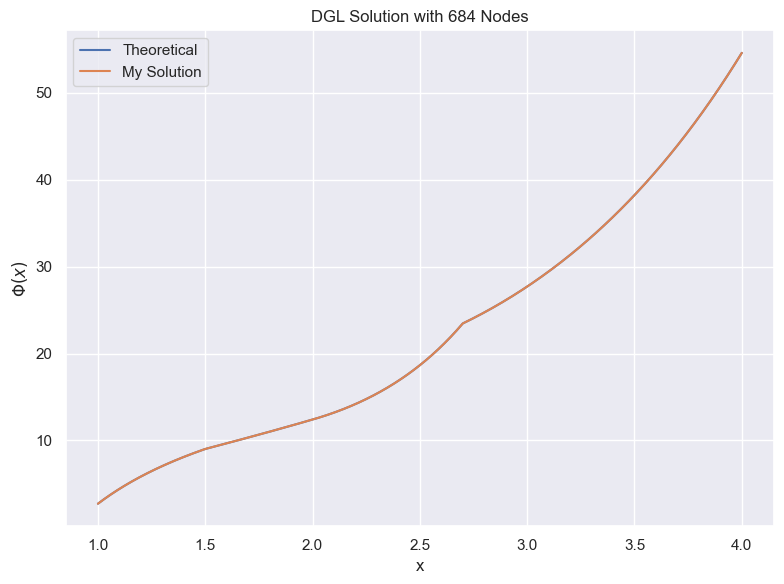

In [6]:
theoretical = np.loadtxt("Lösung/Netz1D_LoesungA.dat")
theoretical_df = myfunc.create_solution_df(nodes, theoretical)

solution_df = myfunc.create_solution_df(nodes, solution)


plt.figure(figsize=(8, 6))
plt.plot(theoretical_df["x"], theoretical_df["Phi"], label="Theoretical")
plt.plot(solution_df["x"], solution_df["Phi"], label="My Solution")

plt.xlabel("x")
plt.ylabel(r"$\Phi (x)$")
plt.title(f"DGL Solution with {number_of_nodes} Nodes")
plt.legend()

plt.tight_layout()
plt.show()

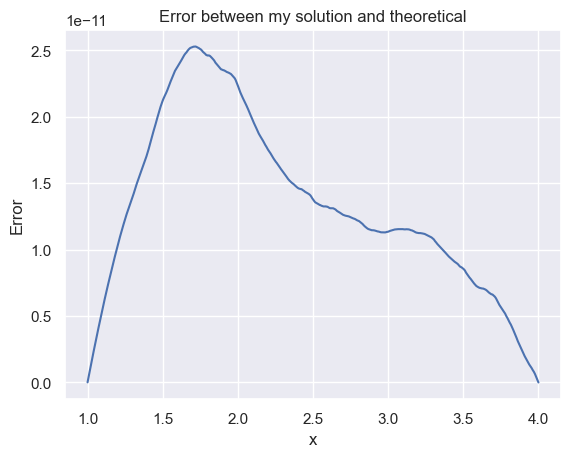

In [7]:
plt.plot(solution_df["x"], solution_df["Phi"]-theoretical_df["Phi"])
plt.xlabel("x")
plt.ylabel("Error")
plt.title("Error between my solution and theoretical")

plt.show()